## 1. Bussiness Understanding

In this notebook, we analyze the breast cancer dataset accessible from UCI repository. We will classify the tumor based on different attributes such as size, shape into benign and malignant.

## 2. Collect Data

We will collect data from url='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

## 3. Exploring and preparing the data

In the first step, we should import the required libraries.

In [72]:
##Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import pandas_profiling as pp
import seaborn as sns
from scipy import stats
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
%matplotlib inline

### 3.a Load the data and create a data frame

In [73]:
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(url, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [74]:
#rename the headers
header = ['id_number','Thickness','Size','Shape', 'Adhesion','Epithelial_size', 'Bare_Nuclei',
          'Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = header

In [75]:
df.head()

,id_number,Thickness,Size,Shape,Adhesion,Epithelial_size,Bare_Nuclei,Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [76]:
df.tail()

,id_number,Thickness,Size,Shape,Adhesion,Epithelial_size,Bare_Nuclei,Chromatin,Normal_Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


### 3.b Exploration Data Analysis (EDA)

In [77]:
#Generating a report
pp.ProfileReport(df)

Number of variables,11
Number of observations,699
Total Missing (%),0.0%
Total size in memory,60.1 KiB
Average record size in memory,88.1 B
Numeric,8
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [78]:
df.Bare_Nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

### 3.c Cleaning the data
By checking the unique values it can be seen that Bare_Nuclei is the only attribute with missing value. In order to take care of missing value, we can cast the ? into nan. 

In [79]:
df.replace('?', np.nan, inplace = True)
df['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [80]:
df.isna().sum()

id_number           0
Thickness           0
Size                0
Shape               0
Adhesion            0
Epithelial_size     0
Bare_Nuclei        16
Chromatin           0
Normal_Nucleoli     0
Mitoses             0
Class               0
dtype: int64

And then we can remove the missing values since there are 16 missing values.

In [81]:
df.dropna(inplace = True) 

In [82]:
df.shape

(683, 11)

In [83]:
df['Class'].replace(2, 0, inplace = True)
df['Class'].replace(4, 1, inplace = True)

In [84]:
#Covert to 0 beningo and 1 maligno
df_b = df[df['Class'] == 0]
df_m = df[df['Class'] == 1]

### 3. d Visualization
Visualization of breast characteristics for positive and negatives diagnoses 

In [85]:
def generatePlot(df_b,df_m, b,indexPlot):
    fig = plt.figure()
    ax = fig.add_subplot(3,4,indexPlot)
    ax.hist(df_b.loc[:,b], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(df_m.loc[:,b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)
    #sns.set_style("whitegrid")
    plt.tight_layout()
    plt.legend()
    plt.show()



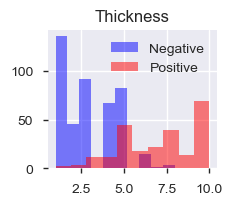

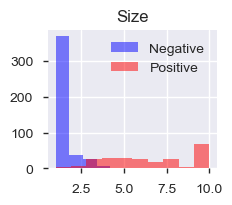

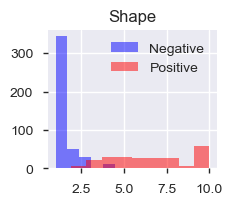

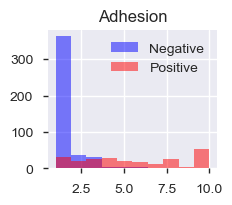

In [86]:
namesB= list(df.columns)[1:5]
for i in range(len(namesB)):
    generatePlot(df_b,df_m,namesB[i], 1)
    
    

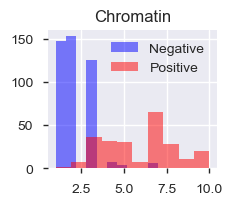

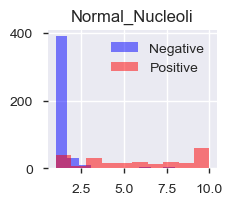

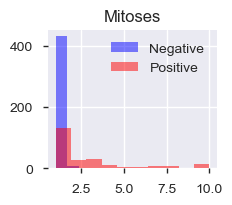

In [87]:
namesB= list(df.columns)[7:10]

for i in range(len(namesB)):
    generatePlot(df_b,df_m,namesB[i], 1)

The graphs show how different categories are distributed. It can be seen that in some cases such as adhesion and size some levels are less than the rest. If the classification approach doesn’t work we can bin the levels to improve the prediction. In most cases level 1 is the most occurring instance.

Text(0.5,1,'Counts of Class')

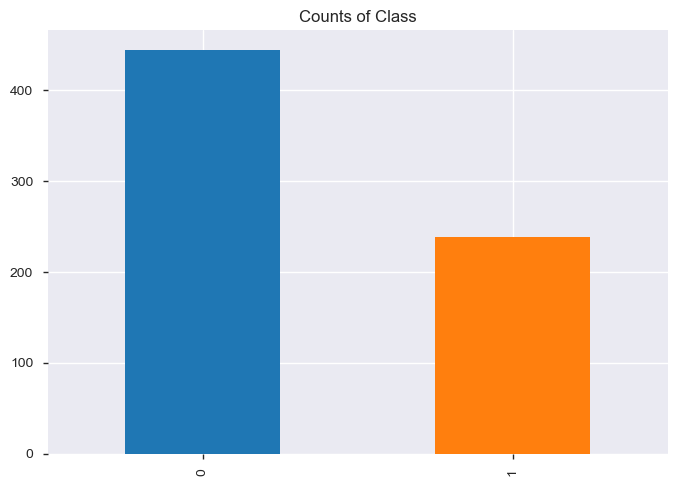

In [88]:
df.loc[:,'Class'].value_counts().plot(kind='bar')
plt.title('Counts of Class')

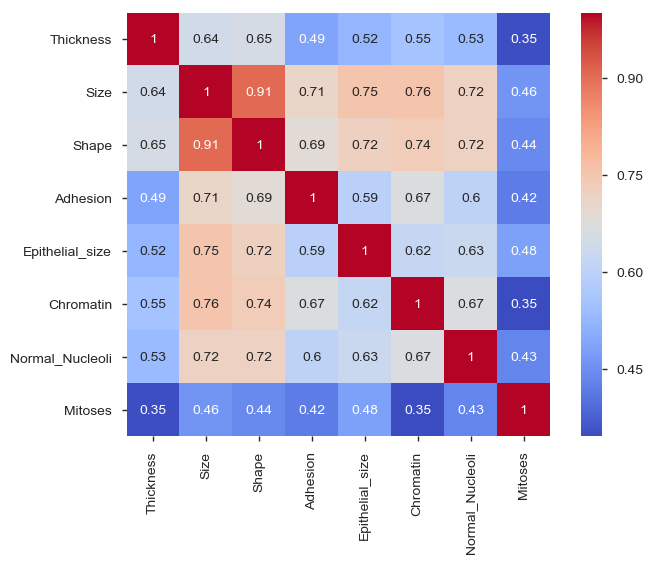

In [89]:
features_mean= list(df.columns[1:10])
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

Shape is highly correlated with Size (ρ = 0.90688) 


### 3.d Data Preprocessing

Split data into training and test sets
Normalize data to account for feature scaling. We can drop id_numbers since they are not the attributes that can affect on class

In [90]:
# Split data into testing and training set. Use 80% for training
n = len(df.columns) # determines the number of columns in dataset
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:n-1], df['Class'], train_size = .8 )



In [91]:
# The normalize features to account for feature scaling

# Instantiate 
norm = Normalizer()

# Fit
norm.fit(X_train)

# Transform both training and testing sets
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

X_train_norm=X_train
X_test_norm=X_test

## Step 4: Trainning a model


### 4.a Model Testing
We'll start by testing a variety of algorithms using scikit-learns's gridsearch method for model optimization.
Our models will include both parametric (e.g. SVM) and non-parametric (e.g. KNN) and linear (e.g. Logistic Regression) and nonlinear modles (e.g. Random Forest Classifier).

In [92]:
# Define parameters for optimization using dictionaries {parameter name: parameter list}

SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
KNN_params = {'n_neighbors':[1,5,10,20], 'p':[2], 'metric':['minkowski']}
RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy'], 'max_depth':[10, 50, 100]}
NB_mult_params = {'alpha':[1,10]}

In [93]:
# Append list of models with parameter dictionaries

models_opt = []

models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
models_opt.append(('SVM', SVC(), SVM_params))
models_opt.append(('NB', MultinomialNB(), NB_mult_params))

In [94]:
# Create global list to collect model CV scores and list of model names (for visualization)
results = []
names = []

# Set the scoring parameter of CV_score to measure model accuracy
scoring = 'accuracy'


# Define a 'for loop' to cycle through list of models and parameter dictionaries
for name, model, params in models_opt:
    
# Use kfolds to break the training data into 5 folds for cross validation
    kfold = KFold(len(X_train_norm), n_folds=5, random_state=2, shuffle=True)
    
# Instantiate gridsearch using the model and parameters (pull from above list of dictionaries)
    model_grid = GridSearchCV(model, params)
    
# Use cross validation method with gridsearch instantiated model, normalized training and 
# testing data, kolds and the scoring parameters
    cv_results = cross_val_score(model_grid, X_train_norm, y_train, cv = kfold, scoring=scoring)

# Append results list with model cv data that includes accuracy scores for 5-fold cross validation 
    results.append(cv_results)

# Append names list - this will help organize model cv performance data with the actaully model name 
    names.append(name)

# Define a string object to list model name, cv accuracy, and cv standard deviation.
    msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())

# Print message object after completion of 'for loop.'
    print(msg)



Cross Validation Accuracy LR: Accarcy: 0.974362 SD: 0.016812
Cross Validation Accuracy LDA: Accarcy: 0.963353 SD: 0.021732
Cross Validation Accuracy KNN: Accarcy: 0.963353 SD: 0.023229
Cross Validation Accuracy DTC: Accarcy: 0.945038 SD: 0.023956
Cross Validation Accuracy RFC: Accarcy: 0.976163 SD: 0.014923
Cross Validation Accuracy SVM: Accarcy: 0.967023 SD: 0.019776
Cross Validation Accuracy NB: Accarcy: 0.897498 SD: 0.030642


In [95]:
# Guassian Naive Bayes does not require optimization so we will run it separately without
# gridsearch and append the performance results to the results and names lists.

# Instantiate model
GNB =  GaussianNB()

# Define kfold - this was done above but not as a global variable 
kfold = KFold(len(X_train_norm), n_folds=5, random_state=2, shuffle=True)

# Run cross validation
cv_results_GNB= cross_val_score(GNB,X_train_norm, y_train, cv = kfold, scoring = scoring )

# Append results and names lists
results.append(cv_results_GNB)
names.append('GNB')

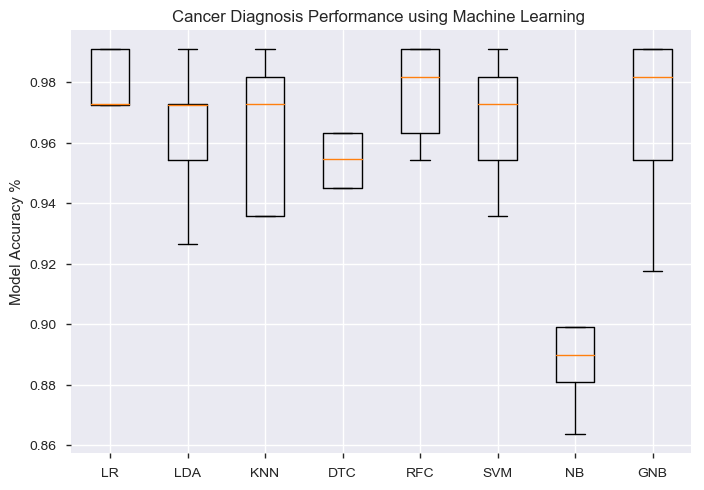

In [96]:
# Visualize model accuracies for comparision - boxplots will be appropriate to visualize 
# data variation

plt.boxplot(results, labels = names)
plt.title('Cancer Diagnosis Performance using Machine Learning ')
plt.ylabel('Model Accuracy %')
sns.set_style("whitegrid")
plt.show()


### 4.b Follow-up Model Testing
- It looks like LDA and RFC performed best during cross validation.
- Next, retry these models on test data after training on the entire training set.


#### Test Linear Discriminant Analysis (LDA)

In [97]:
# Instantiate a new LDA model
lda_2 = LinearDiscriminantAnalysis()

# Fit LDA model to the entire training data
lda_2.fit(X_train_norm, y_train)

# Test LDA model on test data
lda_2_predicted = lda_2.predict(X_test_norm)


In [98]:
# Use sklearn's 'accuracy_score' method to check model accuracy during testing
print('Linear discriminant model analyis Accuracy is: {}'.format(accuracy_score(y_test,lda_2_predicted )))

Linear discriminant model analyis Accuracy is: 0.948905109489051


In [99]:
confusion_matrix_lda = pd.DataFrame(confusion_matrix(y_test, lda_2_predicted), index = ['Actual Negative','Actual Positive'], columns = ['Predicted Negative','Predicted Postive'] )

print('Linear discriminant Model Confusion Matrix')
confusion_matrix_lda

Linear discriminant Model Confusion Matrix


,Predicted Negative,Predicted Postive
Actual Negative,85,3
Actual Positive,4,45


In [100]:
print('Linear discriminant Model Classification Report')
print(classification_report(y_test, lda_2_predicted))

Linear discriminant Model Classification Report
             precision    recall  f1-score   support

          0       0.96      0.97      0.96        88
          1       0.94      0.92      0.93        49

avg / total       0.95      0.95      0.95       137



#### Test Random Forest Classifier

In [101]:
# Parameters
RF_params = {'n_estimators':[10,50,100, 200]}

# Instantiate RFC
RFC_2 = RandomForestClassifier(random_state=42)

# Instantiate gridsearch using RFC model and dictated parameters
RFC_2_grid = GridSearchCV(RFC_2, RF_params,cv= 5)

# Fit model to training data
RFC_2_grid.fit(X_train_norm, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [102]:
# Check best parameters
RFC_2_grid.best_params_

{'n_estimators': 200}

In [103]:
# Train RFC on whole training set

# Instantiate RFC with optimal parameters
RFC_3 = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit RFC to training data
RFC_3.fit(X_train_norm, y_train)

# Predict on training data using fitted RFC
RFC_3_predicted = RFC_3.predict(X_test_norm)

In [104]:
# Quick test of RFC accuracy on testing data
RFC_3_score = accuracy_score(y_test, RFC_3_predicted)
RFC_3_score

0.9635036496350365


TP rates: [0.   0.98 1.  ]

FP rates: [0.   0.05 1.  ]

Probability thresholds: [2 1 0]


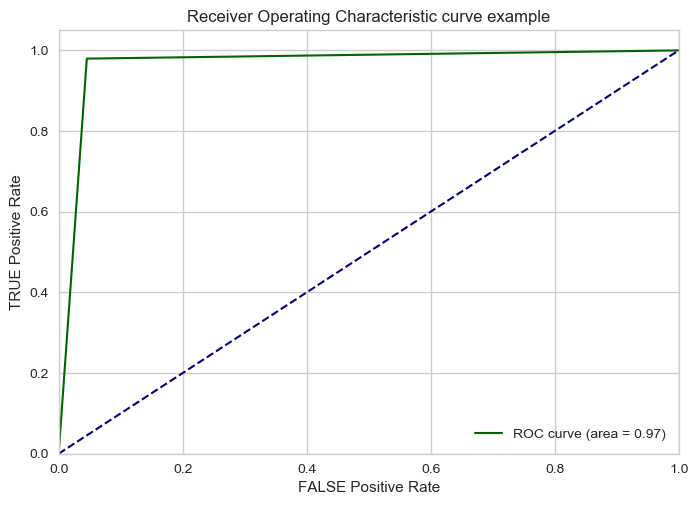

In [116]:
# ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color

fpr, tpr, th = roc_curve(y_test, RFC_3_predicted, pos_label=1) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))
plt.figure()
plt.title('Receiver Operating Characteristic curve example')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate')
plt.ylabel('TRUE Positive Rate')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)

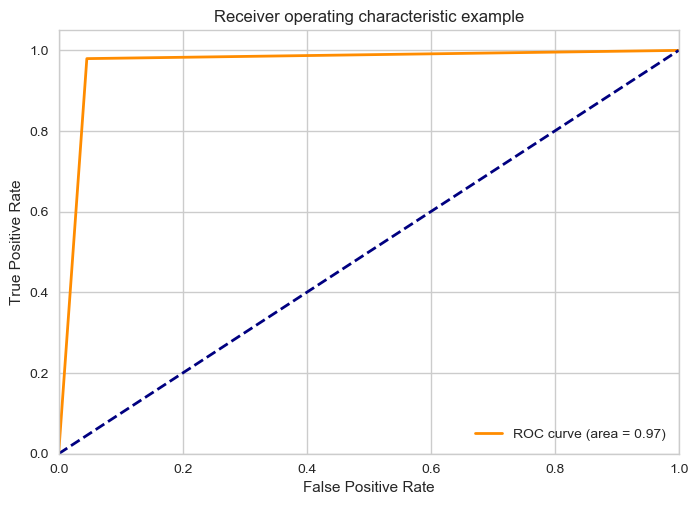

In [117]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, RFC_3_predicted , pos_label=1)
metrics.auc(fpr, tpr)
plt.figure()
lw = 2
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()